**Goal of the notebook** : 

A familiarization with Seattle's environmental data in order to implement prediction models targeting 2 features in non-residential buildings :
- Greenhouses gases emissions.
- The total consumption of energy.


**Table of contents**<a id='toc0_'></a>    
- 1. [Opening the data set](#toc1_)    
  - 1.1. [Missing values](#toc1_1_)    
  - 1.2. [ astype category](#toc1_2_)    
  - 1.3. [Identifying what seems reliable in the data set](#toc1_3_)    
- 2. [Univariate analysis](#toc2_)    
  - 2.1. [Building Type](#toc2_1_)    
  - 2.2. [Primary Property Type](#toc2_2_)    
  - 2.3. [Zip Code](#toc2_3_)    
  - 2.4. [Year Built (or complete renovation)](#toc2_4_)    
  - 2.5. [Neighborhood](#toc2_5_)    
  - 2.6. [Number of Buildings in the property](#toc2_6_)    
  - 2.7. [Number of floors](#toc2_7_)    
  - 2.8. [Property GFA Building(s)](#toc2_8_)    
  - 2.9. [ENERGYSTAR Score](#toc2_9_)    
  - 2.10. [Largest Property Use Type](#toc2_10_)    
    - 2.10.1. [Reinforcing the non-residential properties selection](#toc2_10_1_)    
    - 2.10.2. [Exploring what remains in 'Other' and 'Mixed Use Property'](#toc2_10_2_)    
- 3. [Location of the properties](#toc3_)    
- 4. [Features engineering](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

# HELPER FUNCTIONS

def neighborhood_correction(data):
    """ formatting strings """
    pass

def number_of_buildings_correction(data):
    """ 0 impossible """
    pass

def dtypes_optimization(data):
    # Categorization
    categories = ['BuildingType',
                  'PrimaryPropertyType',
                  'City',
                  'State',
                  'Neighborhood',
                  'ComplianceStatus']

    data.loc[:, categories] = (data.loc[:, categories]
                               .apply(lambda x: x.astype('category'), axis=0))
    
    # Integers    
    return data
### End of dtypes_optimization

def selecting_non_residential_buildings(data):
    """ Filtering on BuildingType and PrimaryPropertyType """
    # BuildingType
    sel = ['NonResidential',
           'Nonresidential COS',
           'Campus',               
           'SPS-District K-12',    
           'Nonresidential WA']
    
    sel2 = ['Senior Care Community',
            'College/University',
            'Hotel',
            'Residence Hall/Dormitory',
            'Parking',
            'Office']
    
    mask = (data.BuildingType.isin(sel)) 
            # & (data.LargestPropertyUseType.isin(sel2)))
    
    data = data.loc[mask, :]
    # At this point, There are still some properties to discard.
    # The ones which were not in sel but which have Multifamily Housing
    # In the Largest Use.
    data = data.loc[data.LargestPropertyUseType != 'Multifamily Housing']
    return data
    
def selecting_reliable_properties(data):
    """ Avoiding default values, non-compliant and missing data
    in ComplianceStatus"""
    data = data.loc[data.ComplianceStatus == 'Compliant', :]    
    return data

def data_cleansing(data):
    """  """
    data = data.drop('Comments', axis=1) # Hold no info
    selecting_reliable_properties(data)
    selecting_non_residential_buildings(data)
    
    
    return data

# 1.  [&#9650;](#toc0_) <a id='toc1_'></a>Opening the data set

Some info on the data set:

Seattle’s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle.This update to the benchmarking mandate was passed by Seattle City Council on February 29, 2016.

In [15]:
initial_data = pd.read_csv('./2016_Building_Energy_Benchmarking.csv',
                   index_col='OSEBuildingID')

data = initial_data.copy()
display(data.head())
data.shape

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


(3376, 45)

## 1.1.  [&#9650;](#toc0_) <a id='toc1_1_'></a>Missing values

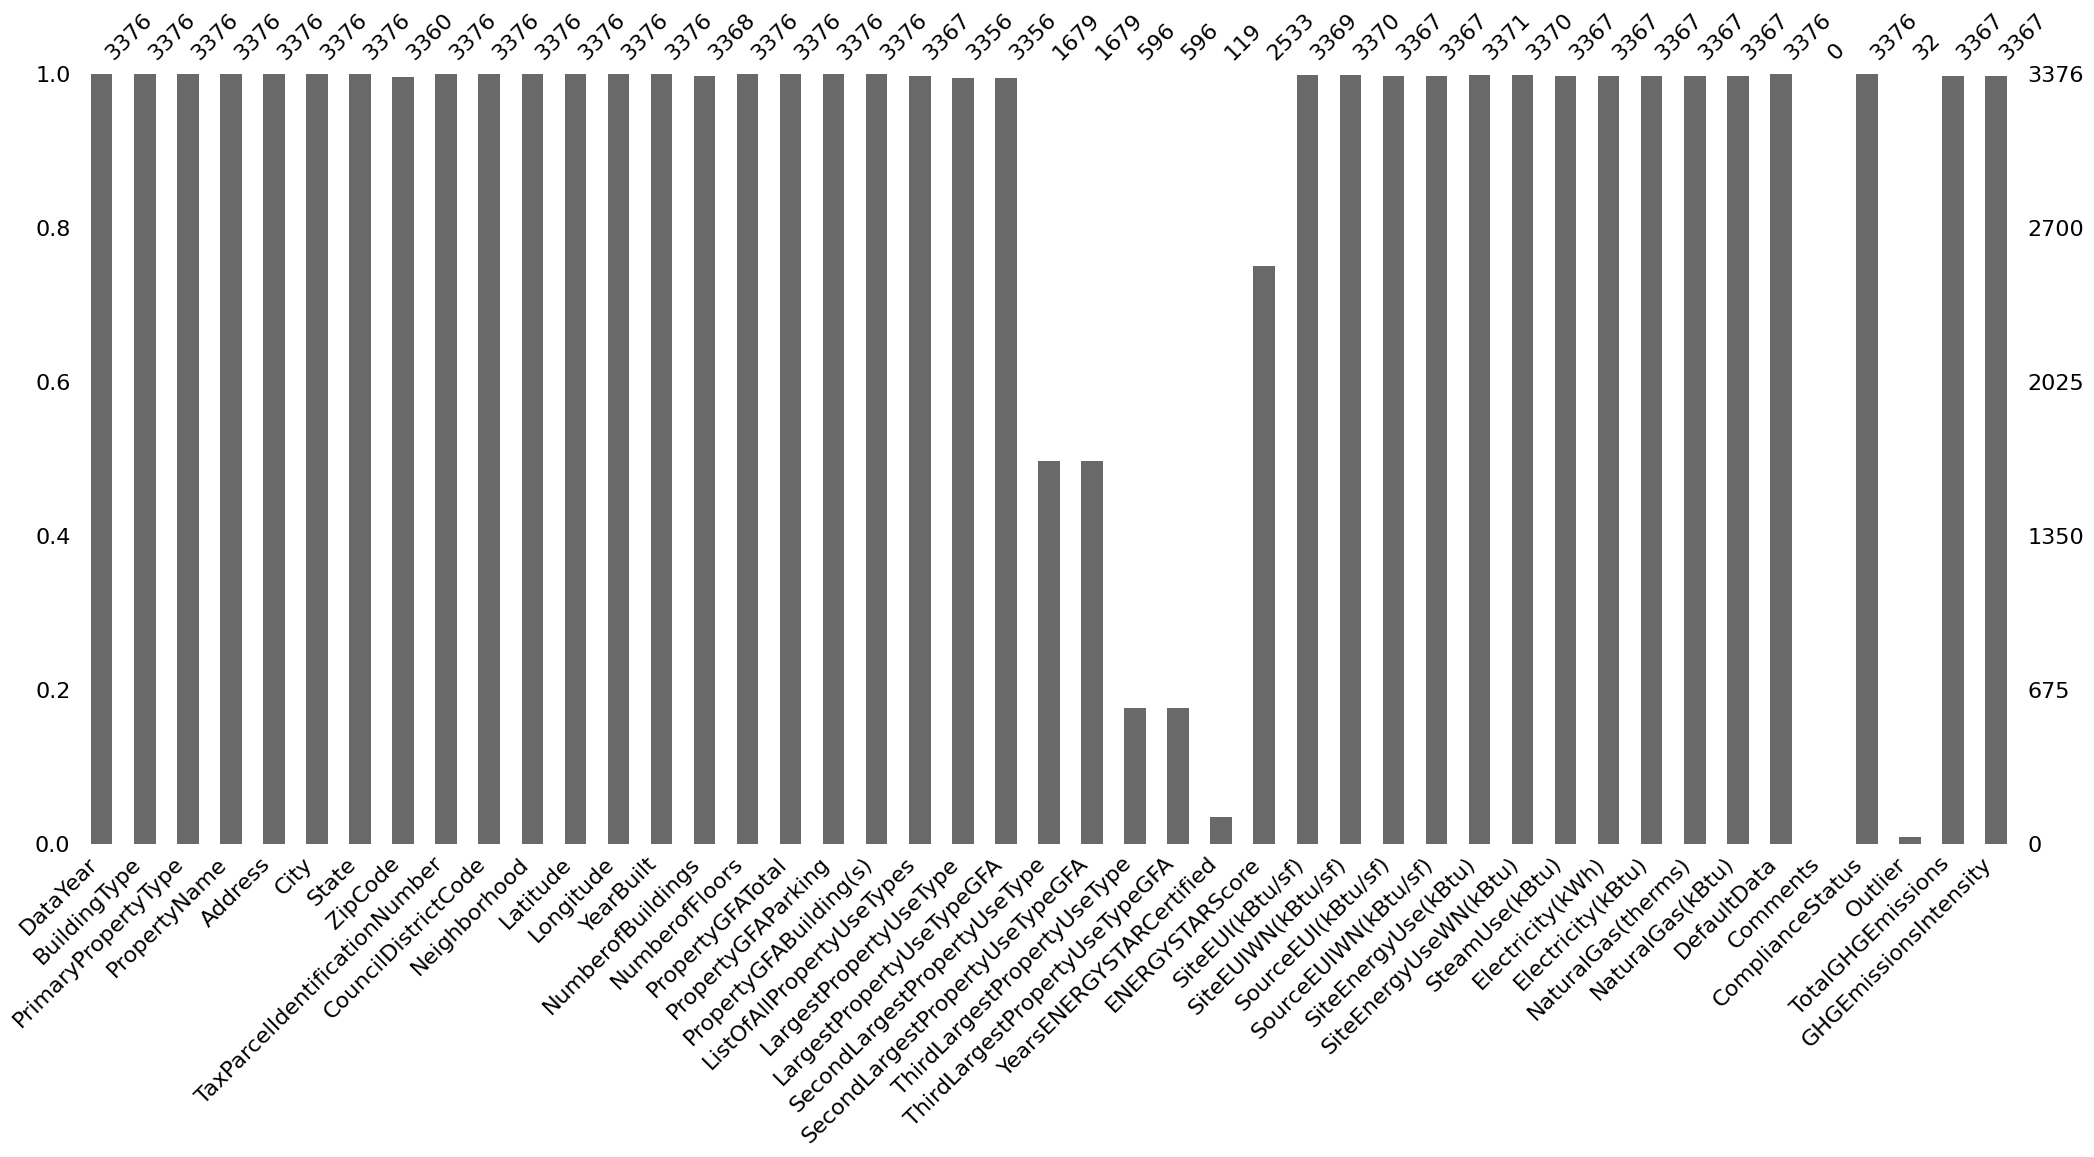

In [142]:
msno.bar(data)
plt.show()

- According [data descriptions](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy), GFA means Gross Floor Area.  
- It is normal to find some missing value for second and third use type of a property. When the property has only one use type.
- About 50 % of the properties have several use types.
- A Building with no ENERGYSTAR certification probably has a missing values in 'YearsENERGYSTARCertified'. So not much are certified.
- ENERGYSTARScore is an on going score calculation doing by colleagues.
- there is no information in 'Comments'.



In [16]:
data = data.drop('Comments', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 1 to 50226
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3376 non-null   int64  
 1   BuildingType                     3376 non-null   object 
 2   PrimaryPropertyType              3376 non-null   object 
 3   PropertyName                     3376 non-null   object 
 4   Address                          3376 non-null   object 
 5   City                             3376 non-null   object 
 6   State                            3376 non-null   object 
 7   ZipCode                          3360 non-null   float64
 8   TaxParcelIdentificationNumber    3376 non-null   object 
 9   CouncilDistrictCode              3376 non-null   int64  
 10  Neighborhood                     3376 non-null   object 
 11  Latitude                         3376 non-null   float64
 12  Longitude          

## 1.2.  [&#9650;](#toc0_) <a id='toc1_2_'></a> astype category

In [144]:
# Searching for more info
for col in data.columns:
    print(f"{col} : {data[col].nunique()} / {data[col].dtype} - {round(data[col].notnull().mean()*100, 2)} %")

DataYear : 1 / int64 - 100.0 %
BuildingType : 8 / object - 100.0 %
PrimaryPropertyType : 24 / object - 100.0 %
PropertyName : 3362 / object - 100.0 %
Address : 3354 / object - 100.0 %
City : 1 / object - 100.0 %
State : 1 / object - 100.0 %
ZipCode : 55 / float64 - 99.53 %
TaxParcelIdentificationNumber : 3268 / object - 100.0 %
CouncilDistrictCode : 7 / int64 - 100.0 %
Neighborhood : 19 / object - 100.0 %
Latitude : 2876 / float64 - 100.0 %
Longitude : 2656 / float64 - 100.0 %
YearBuilt : 113 / int64 - 100.0 %
NumberofBuildings : 17 / float64 - 99.76 %
NumberofFloors : 50 / int64 - 100.0 %
PropertyGFATotal : 3195 / int64 - 100.0 %
PropertyGFAParking : 496 / int64 - 100.0 %
PropertyGFABuilding(s) : 3193 / int64 - 100.0 %
ListOfAllPropertyUseTypes : 466 / object - 99.73 %
LargestPropertyUseType : 56 / object - 99.41 %
LargestPropertyUseTypeGFA : 3122 / float64 - 99.41 %
SecondLargestPropertyUseType : 50 / object - 49.73 %
SecondLargestPropertyUseTypeGFA : 1352 / float64 - 49.73 %
ThirdLa

'City', 'DataYear' and 'State' have the same value for each property. It will not be relevant for prediction. 

I won't inspect it.

In [17]:
# Casting to categories
categories = ['BuildingType',
              'PrimaryPropertyType',
              'City',
              'State',
              'Neighborhood',
              'ComplianceStatus']

data.loc[:, categories] = data.loc[:, categories].apply(lambda x: x.astype('category'), axis=0)    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 1 to 50226
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   DataYear                         3376 non-null   int64   
 1   BuildingType                     3376 non-null   category
 2   PrimaryPropertyType              3376 non-null   category
 3   PropertyName                     3376 non-null   object  
 4   Address                          3376 non-null   object  
 5   City                             3376 non-null   category
 6   State                            3376 non-null   category
 7   ZipCode                          3360 non-null   float64 
 8   TaxParcelIdentificationNumber    3376 non-null   object  
 9   CouncilDistrictCode              3376 non-null   int64   
 10  Neighborhood                     3376 non-null   category
 11  Latitude                         3376 non-null   float64 
 12  Longi

/tmp/ipykernel_18338/1454074869.py:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, categories] = data.loc[:, categories].apply(lambda x: x.astype('category'), axis=0)


## 1.3.  [&#9650;](#toc0_) <a id='toc1_3_'></a>Identifying what seems reliable in the data set

In [146]:
fts = ['DefaultData',
       'ComplianceStatus',
       'Outlier']

for ft in fts:
    print(ft)
    display(data[ft].value_counts())

DefaultData


False    3263
True      113
Name: DefaultData, dtype: int64

ComplianceStatus


Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

Outlier


Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

Only compliant buildings could be used. If so, we do not lose to much data and data are complete and safe to use for prediction.

In [100]:
# Outliers are in compliant buildings ?
data.loc[data.Outlier.notnull(), ['ComplianceStatus', 'Outlier']]

,ComplianceStatus,Outlier
OSEBuildingID,,
350,Non-Compliant,High outlier
539,Non-Compliant,Low outlier
608,Non-Compliant,Low outlier
704,Non-Compliant,High outlier
19708,Non-Compliant,Low outlier
19934,Non-Compliant,Low outlier
19967,Error - Correct Default Data,Low outlier
20367,Non-Compliant,Low outlier
20617,Error - Correct Default Data,Low outlier


All outliers **are not** in compliant buildings. selecting on ComplianceStatus is enough.

In [18]:
data = data.loc[data.ComplianceStatus == 'Compliant', :]
data.shape

(3211, 44)

# 2.  [&#9650;](#toc0_) <a id='toc2_'></a>Univariate analysis

In [148]:
data.columns 

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGE

## 2.1.  [&#9650;](#toc0_) <a id='toc2_1_'></a>Building Type

NonResidential          1432
Nonresidential COS        81
Campus                    24
SPS-District K-12         10
Nonresidential WA          1
Multifamily HR (10+)       0
Multifamily LR (1-4)       0
Multifamily MR (5-9)       0
Name: BuildingType, dtype: int64

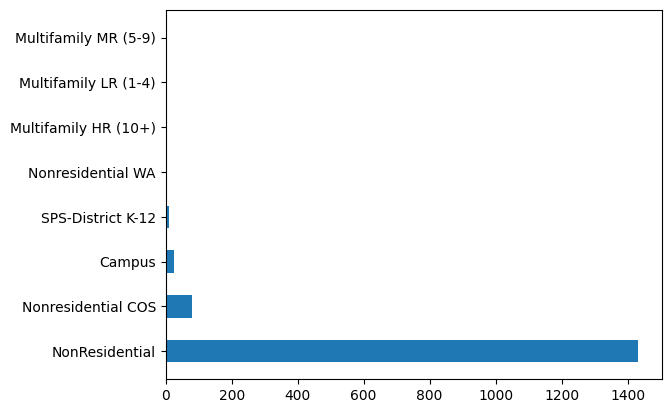

In [36]:
top = data.BuildingType.value_counts().head(10)
display(top)
plt.barh(top.index, top.values, 0.5)
plt.show()

In [37]:
# Selecting only Non-residential buildings.
sel = ['NonResidential',
       'Nonresidential COS',
       'Campus',               
       'SPS-District K-12',    
       'Nonresidential WA']

data = data.loc[data.BuildingType.isin(sel), :]
data.shape

(1548, 44)

There are 1548 non-residential buildings.

## 2.2.  [&#9650;](#toc0_) <a id='toc2_2_'></a>Primary Property Type

Small- and Mid-Sized Office    286
Other                          245
Warehouse                      185
Large Office                   169
Mixed Use Property             113
Retail Store                    85
Hotel                           75
Worship Facility                69
Distribution Center             53
K-12 School                     50
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Laboratory                      10
Hospital                        10
Low-Rise Multifamily             2
Mid-Rise Multifamily             0
Office                           0
High-Rise Multifamily            0
Name: PrimaryPropertyType, dtype: int64

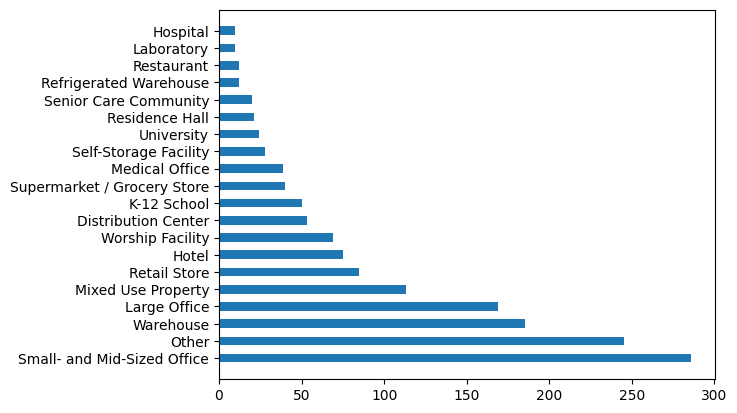

In [38]:
display(data.PrimaryPropertyType.value_counts())
top = data.PrimaryPropertyType.value_counts().head(20)
plt.barh(top.index, top.values, 0.5)
plt.show()

I'll need to explore what is in 'Other' and 'Mixed Use Property'  if possible. 

But first let's see why residential buildings remain.

In [39]:
data.loc[data.PrimaryPropertyType == 'Low-Rise Multifamily']

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19445,2016,NonResidential,Low-Rise Multifamily,Pacific Pointe,2108 N Pacific St.,Seattle,WA,98103.0,0354000254,4,LAKE UNION,47.64859,-122.33311,2000,1.0,3,93079,36093,56986,Multifamily Housing,Multifamily Housing,91064.0,NaN,NaN,NaN,NaN,NaN,32.0,21.900000,23.000000,63.099998,65.099998,1997181.5,2090011.625,0.0,5.111956e+05,1744199.0,2529.819824,252982.0,False,Compliant,NaN,25.60,0.28
21481,2016,Campus,Low-Rise Multifamily,Sanitary Market,1525 FIrst Avenue,Seattle,WA,98101.0,1976200210,7,DOWNTOWN,47.60918,-122.34079,1942,1.0,4,45500,0,45500,"Bar/Nightclub, Food Sales, Multifamily Housing, Restaurant, Retail Store, Self-Storage Facility",Multifamily Housing,22669.0,Retail Store,10455.0,Restaurant,3668.0,NaN,NaN,85.199997,85.199997,267.500000,267.500000,3778355.0,3778355.000,0.0,1.107372e+06,3778355.0,0.000000,0.0,False,Compliant,NaN,26.34,0.58


There is some wrong information here because the 2 properties have Low-Rise Multifamily in both PrimaryPropertyTime and LargestPropertyTypeUse. So building type seems wrong.

May be my way of selecting properties was a bit to naive. I will cross information for that in my function called 'selecting_non_residential_properties'.

See section of LargestPropertyTypeUse for more exploration.

## 2.3.  [&#9650;](#toc0_) <a id='toc2_3_'></a>Zip Code

98134.0    180
98104.0    153
98101.0    144
98109.0    138
98108.0    111
98122.0     86
98121.0     83
98105.0     80
98103.0     63
98119.0     60
Name: ZipCode, dtype: int64

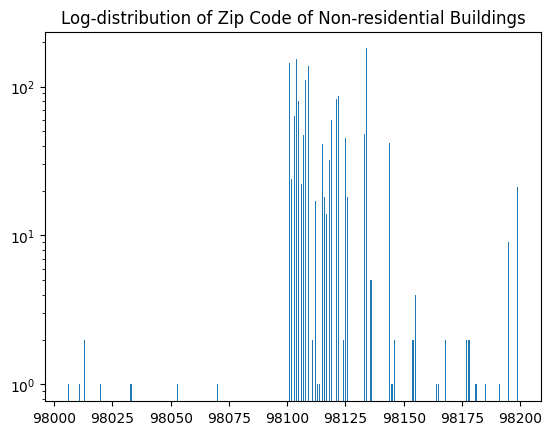

In [40]:
display(data.ZipCode.value_counts().head(10))
a = data.ZipCode.value_counts()
plt.bar(a.index, a.values, 0.5, log=True)
plt.title('Log-distribution of Zip Code of Non-residential Buildings')
plt.show()

In [41]:
data.ZipCode.isnull().sum()
# data.ZipCode = data.ZipCode.astype('int32')

13

May be missing values can be assessed crossing with 'Neighborhood'.

## 2.4.  [&#9650;](#toc0_) <a id='toc2_4_'></a>Year Built (or complete renovation)

1900    43
1970    31
2000    30
1910    28
1979    28
1960    28
1926    27
1962    27
1969    25
1980    25
Name: YearBuilt, dtype: int64

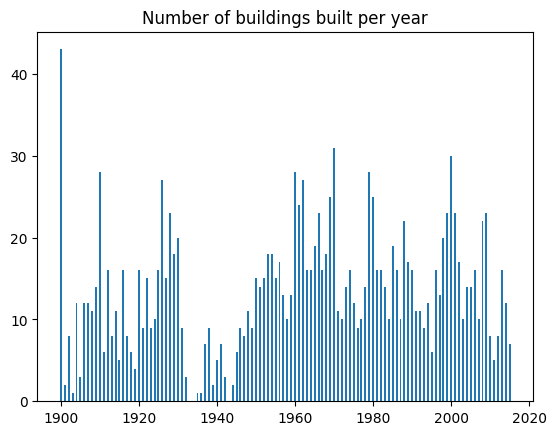

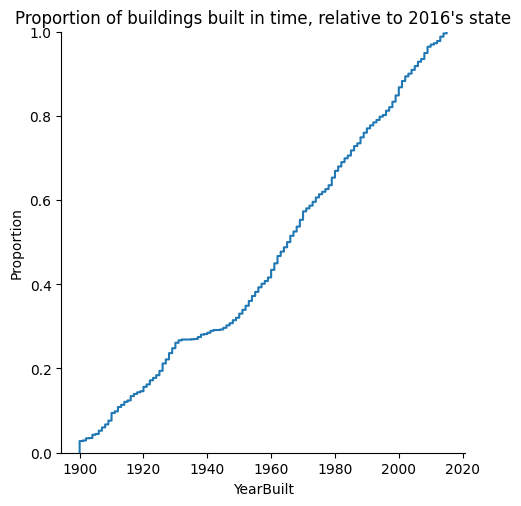

In [42]:
display(data.YearBuilt.value_counts().head(10))
a = data.YearBuilt.value_counts()
plt.bar(a.index, a.values, 0.5)
plt.title('Number of buildings built per year')
plt.show()
data.YearBuilt.describe()
sns.displot(data=data, x='YearBuilt', kind='ecdf')
plt.title("Proportion of buildings built in time, relative to 2016's state")
plt.show()

In [43]:
data.YearBuilt.isnull().sum()

0

## 2.5.  [&#9650;](#toc0_) <a id='toc2_5_'></a>Neighborhood

DOWNTOWN                  351
GREATER DUWAMISH          328
MAGNOLIA / QUEEN ANNE     144
LAKE UNION                143
NORTHEAST                 117
EAST                      116
NORTHWEST                  74
BALLARD                    58
NORTH                      51
CENTRAL                    42
DELRIDGE                   36
SOUTHEAST                  31
SOUTHWEST                  31
North                       8
Ballard                     5
Delridge                    4
Central                     4
Northwest                   4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

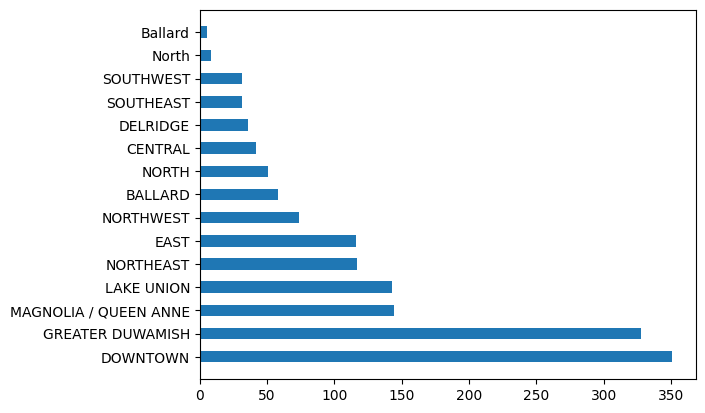

In [44]:
display(data.Neighborhood.value_counts())
top = data.Neighborhood.value_counts().head(15)
plt.barh(top.index, top.values, 0.5)
plt.show()

In [45]:
def neighborhood_correction(df):
    pass
    ## POSSIBLE EVOLUTION : WILL BE DONE IF USED IN PREDICTION MODELS.
    

In [46]:
data.Neighborhood.isnull().sum()

0

## 2.6.  [&#9650;](#toc0_) <a id='toc2_6_'></a>Number of Buildings in the property

1.0      1444
0.0        52
2.0        14
3.0        12
5.0         7
4.0         4
6.0         4
14.0        2
8.0         2
27.0        1
11.0        1
9.0         1
7.0         1
23.0        1
10.0        1
111.0       1
Name: NumberofBuildings, dtype: int64

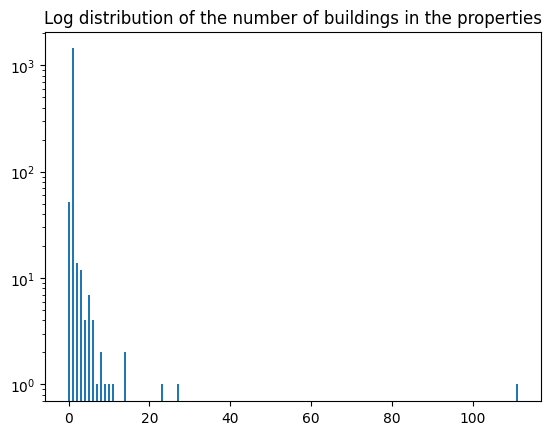

count    1548.000000
mean        1.178941
std         3.039221
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

In [47]:
display(data.NumberofBuildings.value_counts())
a = data.NumberofBuildings.value_counts()
plt.bar(a.index, a.values, 0.5, log=True)
plt.title("Log distribution of the number of buildings in the properties")
plt.show()
data.NumberofBuildings.describe()

In [48]:
# Who is the top outlier? Is it plausible?
data.loc[data.NumberofBuildings == 111]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,Compliant,NaN,11140.56,1.2


In [49]:
# Properties with no buildings although there is at least 20 000 sq. ft.?
df = data.loc[data.NumberofBuildings == 0]
print(df.shape)
df.sample(10)

(52, 44)


,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26119,2016,NonResidential,Retail Store,517 E Pike St Building,517 E Pike St Upper Level,Seattle,WA,98122.0,8804900910,3,EAST,47.613860,-122.324810,1910,0.0,2,24750,0,24750,"Medical Office, Office, Retail Store",Retail Store,19240.0,Office,2050.0,Medical Office,1250.0,NaN,NaN,34.700001,40.200001,63.500000,69.300003,7.823438e+05,9.069606e+05,0.0,8.561480e+04,292118.0,4902.259766,490226.0,False,Compliant,NaN,28.07,1.13
576,2016,NonResidential,Other,Northgate Village,818-832 NE Northgate Way,Seattle,WA,98125.0,2926049468,5,North,47.709400,-122.318430,1969,0.0,2,98539,0,98539,Strip Mall,Strip Mall,98539.0,NaN,NaN,NaN,NaN,NaN,NaN,55.299999,55.799999,169.800003,170.300003,5.450442e+06,5.502264e+06,0.0,1.543474e+06,5266334.0,1841.069946,184107.0,False,Compliant,NaN,46.49,0.47
25661,2016,NonResidential,Small- and Mid-Sized Office,Buttnick City Loan,206 1st Avenue South,Seattle,WA,98104.0,5247800380,7,DOWNTOWN,47.600710,-122.333770,1909,0.0,3,47215,0,47215,"Office, Retail Store",Office,23659.0,Retail Store,22376.0,NaN,NaN,NaN,58.0,45.500000,46.400002,131.600006,135.100006,2.092696e+06,2.136896e+06,0.0,4.682223e+05,1597575.0,9918.134766,991813.0,False,Compliant,NaN,63.81,1.35
49783,2016,NonResidential,Laboratory,UW Medicine Phase 3.1,750 Republican Street,Seattle,WA,98109.0,1988201435,7,LAKE UNION,47.623510,-122.341350,2013,0.0,8,339591,114010,225581,"Convenience Store without Gas Station, Laboratory, Parking",Laboratory,172793.0,Parking,139241.0,Convenience Store without Gas Station,294.0,NaN,NaN,240.899994,248.199997,547.700012,550.099976,4.169646e+07,4.295981e+07,0.0,7.154222e+06,24410204.0,172862.562500,17286256.0,False,Compliant,NaN,1088.25,3.20
36034,2016,NonResidential,Retail Store,Harvard Market,1401 Broadway,Seattle,WA,98122.0,3148650000,3,EAST,47.613788,-122.321426,1996,0.0,3,45743,0,45743,Retail Store,Retail Store,45243.0,NaN,NaN,NaN,NaN,NaN,88.0,117.400002,115.500000,322.299988,316.399994,5.313217e+06,5.227774e+06,0.0,1.262440e+06,4307444.0,10057.719730,1005772.0,False,Compliant,NaN,83.45,1.82
657,2016,NonResidential,Mixed Use Property,2200 Westlake - SEDO,2200 Westlake Ave.,Seattle,WA,98121.0,8729740000,7,DOWNTOWN,47.617830,-122.337290,2006,0.0,0,516407,0,516407,"Financial Office, Hotel, Multifamily Housing, Other, Parking, Restaurant, Supermarket/Grocery Store",Parking,385196.0,Multifamily Housing,340236.0,Hotel,67627.0,NaN,31.0,76.300003,78.900002,199.199997,202.000000,3.940332e+07,4.075436e+07,0.0,8.626261e+06,29432803.0,99705.117190,9970512.0,False,Compliant,NaN,734.72,1.42
391,2016,NonResidential,Mixed Use Property,Thaw Building,8300 Military Rd South,Seattle,WA,98108.0,0007400015,2,GREATER DUWAMISH,47.528710,-122.294430,1970,0.0,1,88400,0,88400,"Distribution Center, Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,33450.0,Office,29620.0,Distribution Center,27715.0,NaN,42.0,48.299999,53.000000,109.000000,113.900002,4.383100e+06,4.811200e+06,0.0,7.416934e+05,2530658.0,18524.421880,1852442.0,False,Compliant,NaN,116.03,1.31
735,2016,NonResidential,Warehouse,Seattle Marine & Fishing Supply Co.,2121 West Commodore Way,Seattle,WA,98199.0,2771100415,7,MAGNOLIA / QUEEN ANNE,47.659200,-122

- One property has much more buildings than the others. It is the campus.
- We have some problems with the properties having no building indicated. There should be at least 1...
- I'd rather not consider this as such to predict the targets as 91 properties have a problem.


In [50]:
df.PrimaryPropertyType.value_counts()

Other                          13
Small- and Mid-Sized Office    10
Mixed Use Property              6
Large Office                    4
Warehouse                       3
Retail Store                    3
Hotel                           2
Supermarket / Grocery Store     2
Laboratory                      2
Medical Office                  2
Refrigerated Warehouse          1
Restaurant                      1
Residence Hall                  1
Worship Facility                1
Hospital                        1
High-Rise Multifamily           0
Office                          0
Mid-Rise Multifamily            0
Self-Storage Facility           0
Senior Care Community           0
Low-Rise Multifamily            0
K-12 School                     0
University                      0
Distribution Center             0
Name: PrimaryPropertyType, dtype: int64

In [51]:
# Computing percentage of each Primary type that would be discarded from the initial 
# data if I chose to discard buildings with this 0 supposed-error.
df.PrimaryPropertyType.value_counts()*100 / initial_data.PrimaryPropertyType.value_counts()

Distribution Center             0.000000
High-Rise Multifamily           0.000000
Hospital                       10.000000
Hotel                           2.597403
K-12 School                     0.000000
Laboratory                     20.000000
Large Office                    2.312139
Low-Rise Multifamily            0.000000
Medical Office                  5.128205
Mid-Rise Multifamily            0.000000
Mixed Use Property              4.511278
Office                          0.000000
Other                           5.078125
Refrigerated Warehouse          8.333333
Residence Hall                  4.347826
Restaurant                      8.333333
Retail Store                    3.296703
Self-Storage Facility           0.000000
Senior Care Community           0.000000
Small- and Mid-Sized Office     3.412969
Supermarket / Grocery Store     5.000000
University                      0.000000
Warehouse                       1.604278
Worship Facility                1.408451
Name: PrimaryPro

It seems reasonable to discard those buildings as none of the categories would disappear significantly.

In [53]:
# keeping non-zero buildings properties
data = data.loc[data.NumberofBuildings != 0]
print(data.shape)
# Searching for nulls
data.loc[data.NumberofBuildings.isnull(), 'PrimaryPropertyType']

(1496, 44)


Series([], Name: PrimaryPropertyType, dtype: category
Categories (24, object): ['Distribution Center', 'High-Rise Multifamily', 'Hospital', 'Hotel', ..., 'Supermarket / Grocery Store', 'University', 'Warehouse', 'Worship Facility'])

In [54]:
data.PrimaryPropertyType.value_counts().head()

Small- and Mid-Sized Office    276
Other                          232
Warehouse                      182
Large Office                   165
Mixed Use Property             107
Name: PrimaryPropertyType, dtype: int64

In [55]:
# Removing the 3 nulls as they are part of the most well-represented 
# category and saving memory.
data = data.loc[data.NumberofBuildings.notnull()]
print(data.shape)
data.NumberofBuildings = data.NumberofBuildings.astype('uint8')

(1496, 44)


POSSIBLE EVOLUTION : may be instead of discarding (knn imputer per type)

## 2.7.  [&#9650;](#toc0_) <a id='toc2_7_'></a>Number of floors

1     412
2     337
3     230
4     136
5      99
6      80
7      33
8      21
11     18
10     16
0      15
14      9
12      9
9       8
13      7
42      5
15      5
17      4
19      4
16      3
21      3
22      3
23      3
29      3
18      3
20      3
25      3
33      3
36      2
34      2
41      2
24      2
46      1
99      1
27      1
76      1
56      1
30      1
28      1
55      1
63      1
37      1
49      1
47      1
39      1
Name: NumberofFloors, dtype: int64

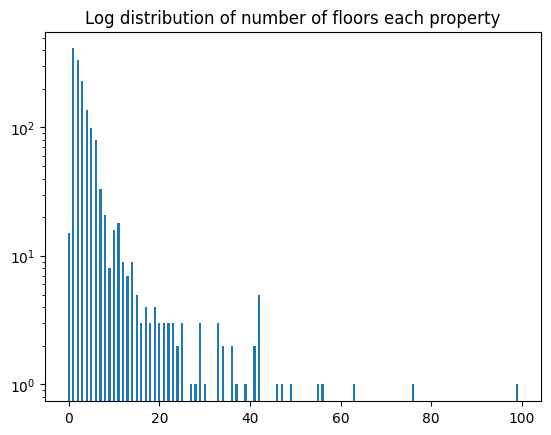

count    1496.000000
mean        4.292112
std         6.847471
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64

In [56]:
ft = 'NumberofFloors'
display(data[ft].value_counts())
a = data[ft].value_counts()
plt.bar(a.index, a.values, 0.5, log=True)
plt.title('Log distribution of number of floors each property')
plt.show()
data[ft].describe()

In [57]:
data.NumberofFloors = data.NumberofFloors.astype('uint8')

## 2.8.  [&#9650;](#toc0_) <a id='toc2_8_'></a>Property GFA Building(s)

<Figure size 800x400 with 0 Axes>

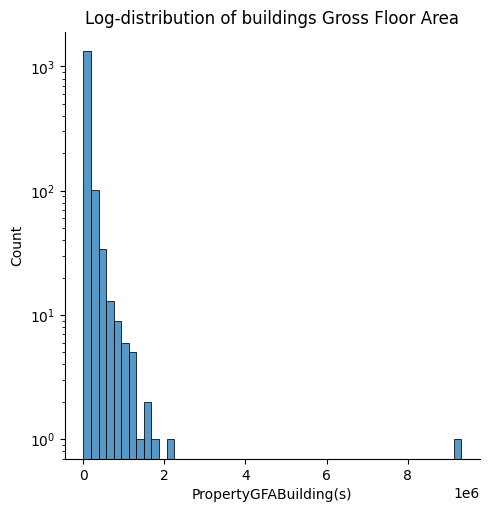

count    1.496000e+03
mean     1.074312e+05
std      2.953401e+05
min      3.636000e+03
25%      2.792675e+04
50%      4.591200e+04
75%      9.491200e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64

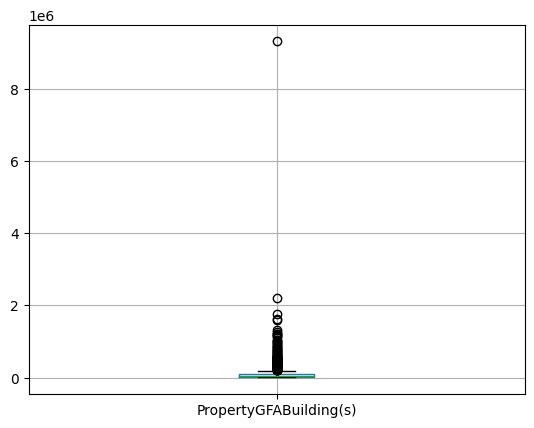

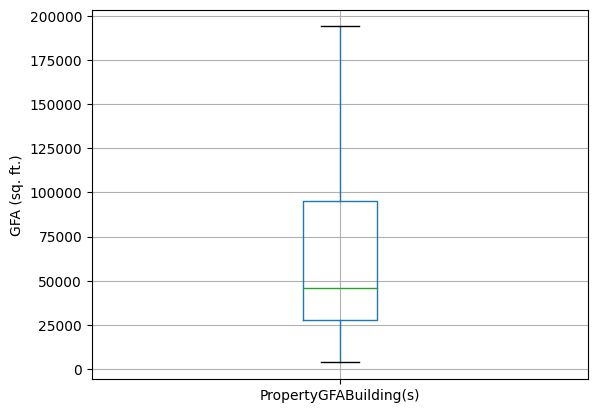

In [58]:
ft = 'PropertyGFABuilding(s)'
plt.figure(figsize=(8,4))
sns.displot(data=data, x='PropertyGFABuilding(s)', bins=50, log=True)
plt.title('Log-distribution of buildings Gross Floor Area')
plt.show()
display(data[ft].describe())
data.boxplot(ft)
plt.show()
data.boxplot(ft, showfliers=False)
plt.ylabel('GFA (sq. ft.)')
plt.show()

In [59]:
data.loc[data[ft] > 3e6]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,Compliant,NaN,11140.56,1.2


No surprise to find the campus as the winner in the floor area category!

In [60]:
data.loc[data[ft] > 1e6]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
245,2016,NonResidential,Other,CenturyLink,800 Occidental Ave. South,Seattle,WA,98134.0,7666204876,2,GREATER DUWAMISH,47.595440,-122.331590,1999,1,6,1585960,327680,1258280,"Other - Entertainment/Public Assembly, Parking",Other - Entertainment/Public Assembly,1585960.0,Parking,0.0,NaN,NaN,NaN,NaN,37.700001,39.200001,104.699997,106.300003,59757440.0,62160304.0,0.000000e+00,14490010.0,49439914.0,103175.179700,10317518.0,False,Compliant,NaN,892.63,0.56
249,2016,NonResidential,Other,Safeco Field,1250 First Avenue South,Seattle,WA,98134.0,7666206483,2,GREATER DUWAMISH,47.590850,-122.333540,1999,1,3,1172127,0,1172127,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,1172127.0,NaN,NaN,NaN,NaN,NaN,NaN,50.099998,49.000000,125.099998,121.400002,58761304.0,57406988.0,0.000000e+00,11905739.0,40622381.0,181389.203100,18138920.0,False,Compliant,NaN,1246.55,1.06
276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,1.225750e+08,49438336.0,168683602.0,18321.291020,1832129.0,False,Compliant,NaN,10734.57,9.26
345,2016,NonResidential,Large Office,999 Third Avenue,"999 3rd Avenue, Suite 1550",Seattle,WA,98104.0,0939000435,7,DOWNTOWN,47.605050,-122.334270,1983,1,47,1323055,0,1323055,"Office, Parking, Restaurant",Office,1011135.0,Parking,272682.0,Restaurant,37595.0,NaN,94.0,42.599998,42.599998,133.500000,133.500000,44683660.0,44683660.0,0.000000e+00,13048606.0,44521844.0,1618.117065,161812.0,False,Compliant,NaN,318.97,0.24
357,2016,Nonresidential COS,Large Office,Seattle Municipal Tower (2030),700 Fifth Avenue,Seattle,WA,98104.0,0942000720,3,DOWNTOWN,47.605010,-122.329880,1990,1,63,1354987,159600,1195387,"Office, Parking",Office,1191115.0,Parking,159599.0,Other,18656.0,2014201320112010200920082007,89.0,50.400002,50.400002,158.100006,158.100006,61576184.0,61576184.0,0.000000e+00,18046946.0,61576180.0,0.000000,0.0,False,Compliant,NaN,429.27,0.32
399,2016,NonResidential,Large Office,1201 Third Avenue,1201 3rd ave,Seattle,WA,98101.0,1974700120,7,DOWNTOWN,47.607230,-122.336110,1988,1,55,1400000,285000,1115000,"Office, Other, Parking, Restaurant",Office,994116.0,Parking,264481.0,Other,133598.0,2017201120102007,92.0,46.700001,48.500000,140.199997,145.300003,53079164.0,55140300.0,2.179488e+06,14499658.0,49472833.0,14268.400390,1426840.0,False,Compliant,NaN,588.90,0.42
402,2016,NonResidential,Large Office,US Bank Centre,1420 5th Avenue,Seattle,WA,98101.0,1975700080,7,DOWNTOWN,47.610540,-122.334660,1989,1,46,1536606,512608,1023998,"Financial Office, Office, Other, Parking, Restaurant, Retail Store",Office,1002403.0,Parking,377046.0,Other,53116.0,201720162014201320122011201020092007,89.0,51.900002,53.599998,157.300003,162.699997,56606136.0,58506844.0,0.000000e+00,15729209.0,53668061.0,29380.699220,2938070.0,False,Compliant,NaN,530.18,0.35
422,2016,NonResidential,Large Office,Two Union Square,601 Union St.,Seattle

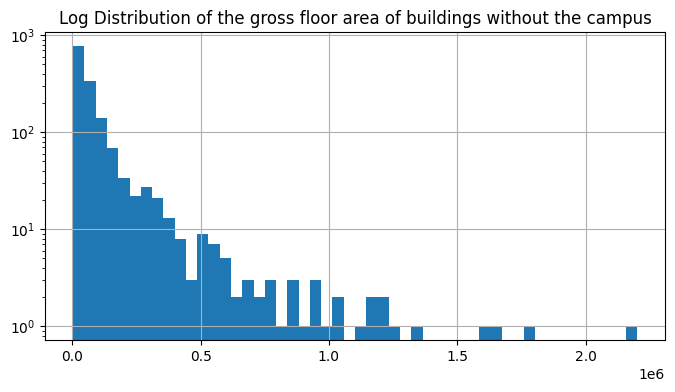

In [61]:
df = data.loc[data[ft] < 3e6]
plt.figure(figsize=(8,4))
df[ft].hist(bins=50, log=True)
plt.title("Log Distribution of the gross floor area of buildings without the campus")
plt.show()

In [62]:
data[ft] = data[ft].astype('uint32')

## 2.9.  [&#9650;](#toc0_) <a id='toc2_9_'></a>ENERGYSTAR Score

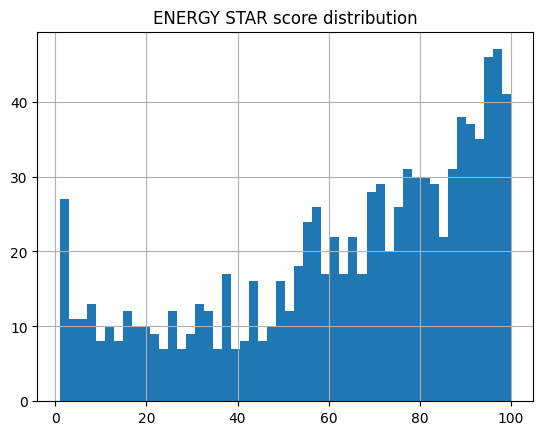

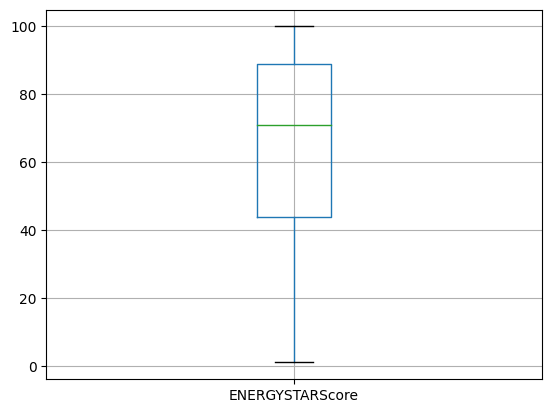

count    973.000000
mean      63.802672
std       28.832104
min        1.000000
25%       44.000000
50%       71.000000
75%       89.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

In [63]:
ft = "ENERGYSTARScore"
data[ft].hist(bins=50)
plt.title('ENERGY STAR score distribution')
plt.show()
data.boxplot(ft)
plt.show()
data[ft].describe()

In [64]:
data[ft].sample(5)

OSEBuildingID
23115    53.0
26359    69.0
23400    69.0
49918     NaN
24893    15.0
Name: ENERGYSTARScore, dtype: float64

In [65]:
data[ft].isnull().mean()

0.34959893048128343

almost 25% of the values are missing.

## 2.10.  [&#9650;](#toc0_) <a id='toc2_10_'></a>Largest Property Use Type

In [67]:
ft = 'LargestPropertyUseType'
data[ft].value_counts()

Office                                                  470
Non-Refrigerated Warehouse                              193
Other                                                    91
Retail Store                                             90
Hotel                                                    73
Worship Facility                                         68
Distribution Center                                      54
K-12 School                                              50
Supermarket/Grocery Store                                40
Medical Office                                           39
Self-Storage Facility                                    27
Parking                                                  27
Other - Recreation                                       26
College/University                                       24
Other - Entertainment/Public Assembly                    21
Senior Care Community                                    20
Residence Hall/Dormitory                

In [69]:
data[['PrimaryPropertyType', ft]].sample(10)

,PrimaryPropertyType,LargestPropertyUseType
OSEBuildingID,,
244,Small- and Mid-Sized Office,Office
22261,Warehouse,Non-Refrigerated Warehouse
295,Other,Other
25743,Worship Facility,Worship Facility
26930,Senior Care Community,Senior Care Community
21945,Other,Parking
425,Large Office,Office
787,Warehouse,Non-Refrigerated Warehouse
24359,Small- and Mid-Sized Office,Office


It is more detailed than PrimaryPropertyType. And thus gives more categories.

I'd rather use PrimaryPropertyType for my predictions models.
Or use this to refine the model in a 'second layer'.

However, this can be a way to reinforce the data selection of non-residential properties on which I had doubts when selecting with BuildingType only. 

### 2.10.1.  [&#9650;](#toc0_) <a id='toc2_10_1_'></a>Searching to reinforce the non-residential properties selection

In [70]:
fts = ['PrimaryPropertyType', 'LargestPropertyUseType', 'BuildingType']
types = data.loc[data.LargestPropertyUseType == 'Multifamily Housing',
                 fts]
display(types)
print(types.shape)

,PrimaryPropertyType,LargestPropertyUseType,BuildingType
OSEBuildingID,,,
264,Mixed Use Property,Multifamily Housing,NonResidential
19445,Low-Rise Multifamily,Multifamily Housing,NonResidential
21122,Mixed Use Property,Multifamily Housing,NonResidential
21481,Low-Rise Multifamily,Multifamily Housing,Campus
23562,Mixed Use Property,Multifamily Housing,NonResidential
25222,Mixed Use Property,Multifamily Housing,NonResidential
25522,Mixed Use Property,Multifamily Housing,NonResidential
26834,Mixed Use Property,Multifamily Housing,NonResidential
27838,Mixed Use Property,Multifamily Housing,NonResidential


(11, 3)


We see 11 inconsistencies.

In [71]:
initial_types = initial_data.loc[initial_data.LargestPropertyUseType == 'Multifamily Housing',
                                 fts]
print(initial_types.PrimaryPropertyType.value_counts())
print()
print(initial_types.BuildingType.value_counts())

Low-Rise Multifamily     976
Mid-Rise Multifamily     563
High-Rise Multifamily    103
Mixed Use Property        25
Name: PrimaryPropertyType, dtype: int64

Multifamily LR (1-4)    983
Multifamily MR (5-9)    569
Multifamily HR (10+)    103
NonResidential           11
Campus                    1
Name: BuildingType, dtype: int64


We found 12 inconsistencies from the initial dataset. One was already discarded ?

In [72]:
# Searching indexes of the 12 buildings
mask = initial_types.BuildingType.isin(['NonResidential', 'Campus'])
display(initial_types.loc[mask, :])
idx = initial_types.loc[mask, :].index
# Finding the one that went through
print([i for i in idx if i not in types.index])


,PrimaryPropertyType,LargestPropertyUseType,BuildingType
OSEBuildingID,,,
264,Mixed Use Property,Multifamily Housing,NonResidential
19445,Low-Rise Multifamily,Multifamily Housing,NonResidential
21122,Mixed Use Property,Multifamily Housing,NonResidential
21481,Low-Rise Multifamily,Multifamily Housing,Campus
23562,Mixed Use Property,Multifamily Housing,NonResidential
25222,Mixed Use Property,Multifamily Housing,NonResidential
25522,Mixed Use Property,Multifamily Housing,NonResidential
25674,Low-Rise Multifamily,Multifamily Housing,NonResidential
26834,Mixed Use Property,Multifamily Housing,NonResidential


[25674]


In [73]:
initial_data.loc[25674, :]

DataYear                                                         2016
BuildingType                                           NonResidential
PrimaryPropertyType                              Low-Rise Multifamily
PropertyName                                   (ID25674) COMET TAVERN
Address                                                 916 E PIKE ST
City                                                          Seattle
State                                                              WA
ZipCode                                                       98122.0
TaxParcelIdentificationNumber                              6003500480
CouncilDistrictCode                                                 3
Neighborhood                                                     EAST
Latitude                                                     47.61427
Longitude                                                  -122.31977
YearBuilt                                                        1910
NumberofBuildings   

It was already discarded because of its Compliance Status

In [74]:
# Checking if there was some false positive. 
sel_BuildingType = ['NonResidential',
                    'Nonresidential COS',
                    'Campus',               
                    'SPS-District K-12',    
                    'Nonresidential WA']

mask = (~initial_data.BuildingType.isin(sel)
        & (initial_data.LargestPropertyUseType != 'Multifamily Housing'))

initial_data.loc[mask, fts]

,PrimaryPropertyType,LargestPropertyUseType,BuildingType
OSEBuildingID,,,
19451,Senior Care Community,Senior Care Community,Multifamily LR (1-4)
19798,Low-Rise Multifamily,NaN,Multifamily LR (1-4)
19801,Other,Other,Multifamily LR (1-4)
20093,Other,Other,Multifamily HR (10+)
20758,Small- and Mid-Sized Office,Office,Multifamily LR (1-4)
20762,High-Rise Multifamily,NaN,Multifamily HR (10+)
21114,Senior Care Community,Senior Care Community,Multifamily HR (10+)
21568,Senior Care Community,Senior Care Community,Multifamily LR (1-4)
21825,Other,Other,Multifamily LR (1-4)


Indeed, we found discarded elements which should have not been.
I will have to handle that in a function later.

For now, it is ok to launch some models on that and see how it goes.

In [75]:
data.shape

(1496, 44)

In [ ]:
#     sel = ['NonResidential',
#            'Nonresidential COS',
#            'Campus',               
#            'SPS-District K-12',    
#            'Nonresidential WA']
    
#     sel2 = ['Senior Care Community',
#             'College/University',
#             'Hotel',
#             'Residence Hall/Dormitory',
#             'Parking',
#             'Office']
    
#     mask = (data.BuildingType.isin(sel)) 
#             # & (data.LargestPropertyUseType.isin(sel2)))
    
#     data = data.loc[mask, :]



### 2.10.2.  [&#9650;](#toc0_) <a id='toc2_10_2_'></a>Exploring what remains in 'Other' and 'Mixed Use Property'

In [76]:
data.loc[(data.LargestPropertyUseType == 'Other'), fts]

,PrimaryPropertyType,LargestPropertyUseType,BuildingType
OSEBuildingID,,,
27,Other,Other,NonResidential
103,Other,Other,Nonresidential COS
104,Other,Other,Nonresidential COS
106,Other,Other,Nonresidential COS
110,Other,Other,Nonresidential COS
111,Other,Other,Nonresidential COS
112,Other,Other,Nonresidential COS
131,Other,Other,NonResidential
132,Other,Other,NonResidential


It is all non-residential

In [77]:
mix = data.loc[(data.PrimaryPropertyType == 'Mixed Use Property'), fts]
print(mix.shape)
mix.sample(30)

(107, 3)


,PrimaryPropertyType,LargestPropertyUseType,BuildingType
OSEBuildingID,,,
50226,Mixed Use Property,Other - Recreation,Nonresidential COS
50094,Mixed Use Property,Laboratory,NonResidential
20141,Mixed Use Property,Distribution Center,NonResidential
27184,Mixed Use Property,Non-Refrigerated Warehouse,NonResidential
21459,Mixed Use Property,Office,NonResidential
26994,Mixed Use Property,Parking,NonResidential
27406,Mixed Use Property,Other - Entertainment/Public Assembly,NonResidential
525,Mixed Use Property,Other - Entertainment/Public Assembly,NonResidential
25666,Mixed Use Property,Retail Store,NonResidential


some family Housing remain as principal use type.

In [78]:
data.shape

(1496, 44)

In [81]:
data = data.loc[~((data.PrimaryPropertyType == 'Mixed Use Property')
                  & (data.LargestPropertyUseType == 'Multifamily Housing')),
                :]

In [82]:
data.shape

(1487, 44)

# 3.  [&#9650;](#toc0_) <a id='toc3_'></a>Location of the properties

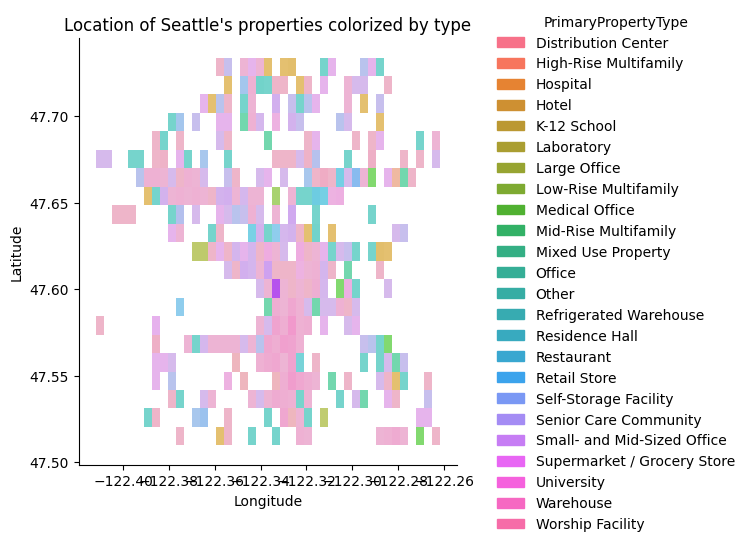

In [83]:
sns.displot(data=data, y='Latitude', x='Longitude', hue='PrimaryPropertyType')
plt.title("Location of Seattle's properties colorized by type")
plt.show()

Some ratios such as :

$\dfrac{LargestPropertyUseTypeGFA}{PropertyGFABuildings}$ can be interesting?

# 4.  [&#9650;](#toc0_) <a id='toc4_'></a>Features engineering

age of the building current - Yearbuilt